#Task 1

Write a function that takes a grayscale image as argument and generates the histogram of that grayscale image. You can use any suitable grayscale image from here: https://www.imageprocessingplace.com/DIP-3E/dip3e_book_images_downloads.htm

In [ ]:
def my_histogram(gray_image):
  #implement this function
  img_array = np.asarray(gray_image)

  histogram= [0] *256
  flattened_img = img_array.flatten()
  for pixel_value in flattened_img:
        histogram[pixel_value] += 1

  return histogram

In [ ]:
def print_image(image):
   img_array = np.asarray(img)
   print(img_array.shape)
   plt.imshow(img_array,cmap='gray')
   plt.axis('off')
   plt.show()

(761, 1153)


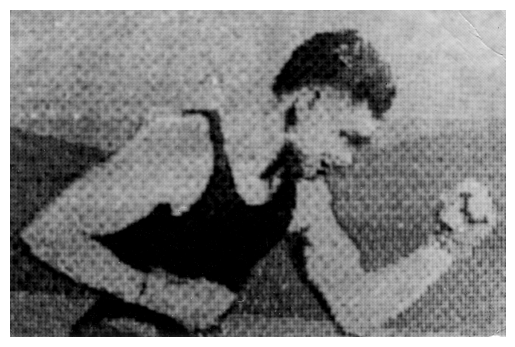

In [ ]:
import  numpy as np
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open('image.tif')
print_image(img)

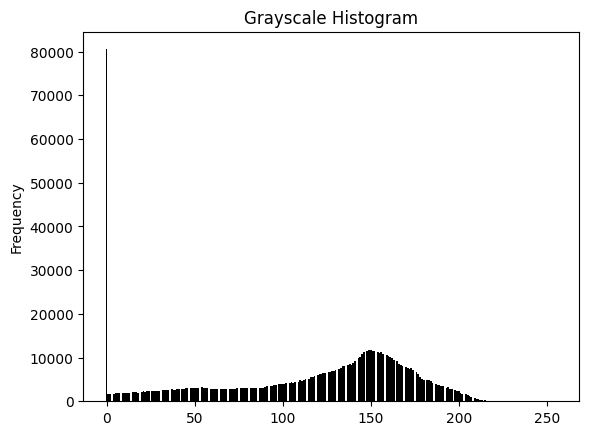

In [ ]:
histogram = my_histogram(img)

####
plt.bar(range(256), histogram, width=1.0, color='black')
plt.ylabel('Frequency')
plt.title('Grayscale Histogram')
plt.show()

# Task 2
Take any suitable color image and divide it into 3 separate channels. Display the individual channels in their own color. For example, the red channel should generate a red image, where the intensity of red in each pixel will depend on how much red is present in that pixel in the original color image

In [ ]:
def channel_show(color_image):
    image_array = np.array(color_image)
    print (image_array.shape)

    red_channel = image_array.copy()
    green_channel = image_array.copy()
    blue_channel = image_array.copy()

    red_channel[:,:,1]=0
    red_channel[:,:,2]=0

    green_channel[:,:,0]=0
    green_channel[:,:,2]=0

    blue_channel[:,:,0]=0
    blue_channel[:,:,1]=0

    fig,axes =plt.subplots(1 ,4, figsize=(16,6))
    axes[0].imshow(red_channel)
    axes[0].set_title('RED ')
    axes[0].axis('off')

    axes[1].imshow(green_channel)
    axes[1].set_title('GREEN')
    axes[1].axis('off')

    axes[2].imshow(blue_channel)
    axes[2].set_title('BLUE')
    axes[2].axis('off')

    axes[3].imshow(image_array)
    axes[3].set_title('Original_image')
    axes[3].axis('off')

    plt.show()

    return  red_channel,green_channel,blue_channel


(666, 666, 3)


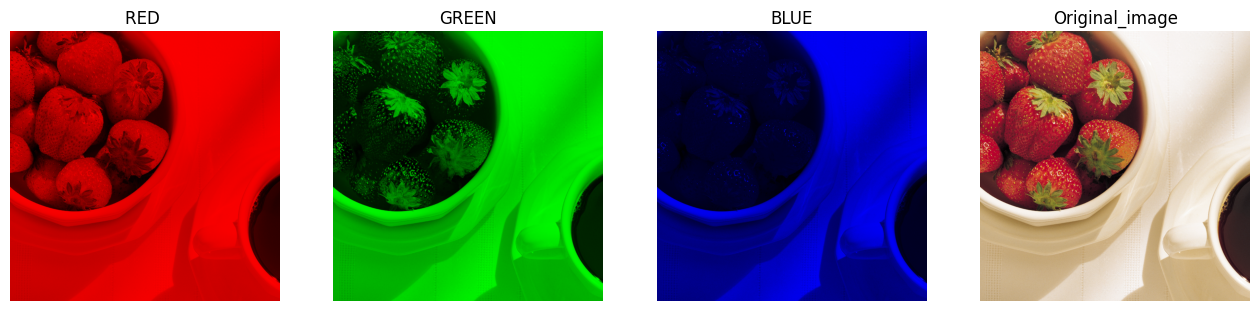

In [ ]:
img_2=Image.open('color_image.tif')
channel_show(img_2)

# Task 3

Use your previously written histogram function from Task 1 to generate the histogram of color image. Since color images have 3 channels, so you will have 3 histograms. Analyze the histograms to determine which color is more dominant in the image.


In [ ]:
#write your implementation here
def color_histogram(color_image):

    red_channel = np.array(color_image)[:, :, 0]
    green_channel = np.array(color_image)[:, :, 1]
    blue_channel = np.array(color_image)[:, :, 2]

    red_histogram = my_histogram(red_channel)
    green_histogram = my_histogram(green_channel)
    blue_histogram = my_histogram(blue_channel)

    plt.figure(figsize=(10, 6))

    plt.subplot(3, 1, 1)
    plt.bar(range(256), red_histogram, color='red')
    plt.title('Red Channel Histogram')

    plt.subplot(3, 1, 2)
    plt.bar(range(256), green_histogram, color='green')
    plt.title('Green Channel Histogram')

    plt.subplot(3, 1, 3)
    plt.bar(range(256), blue_histogram, color='blue')
    plt.title('Blue Channel Histogram')

    plt.tight_layout()
    plt.show()

    ###
    color_intensity_map = {
        "Red": sum(red_histogram),
        "Green": sum(green_histogram),
        "Blue": sum(blue_histogram)
    }

    dominant_color = max(color_intensity_map, key=color_intensity_map.get)
    print(f"The dominant color is {dominant_color}.")



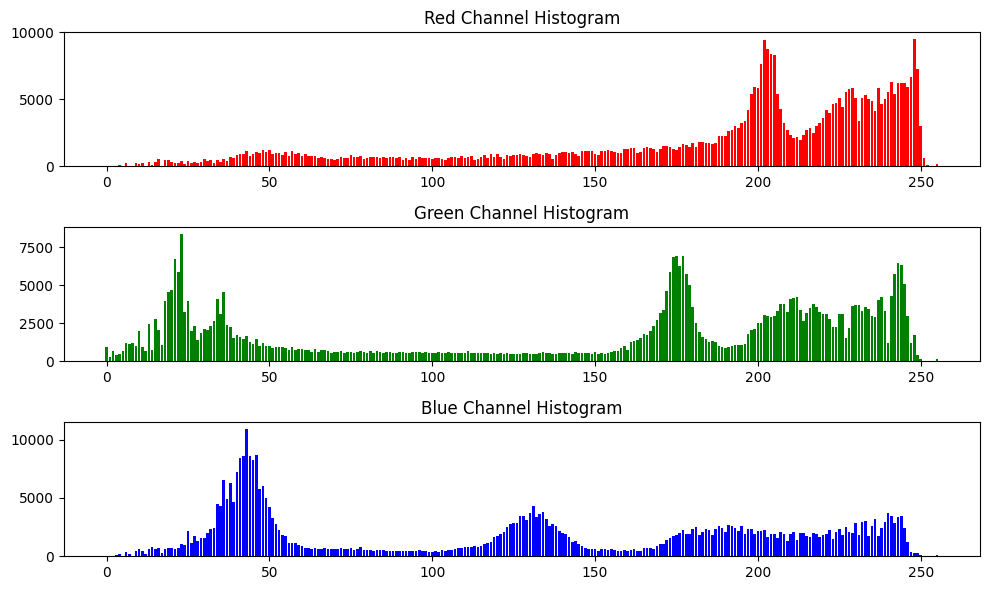

The dominant color is Red.


In [ ]:
color_histogram(img_2)

# Task 4

Write a function that takes 3 parameters: a color image, a channel_number (0 for red, 1 for green and 2 for blue) and an enhancement value between 0 and 1, and returns an enhanced version of the image. Show the enhanced image. As an example, refer to the following image which shows the result for red enhancement.
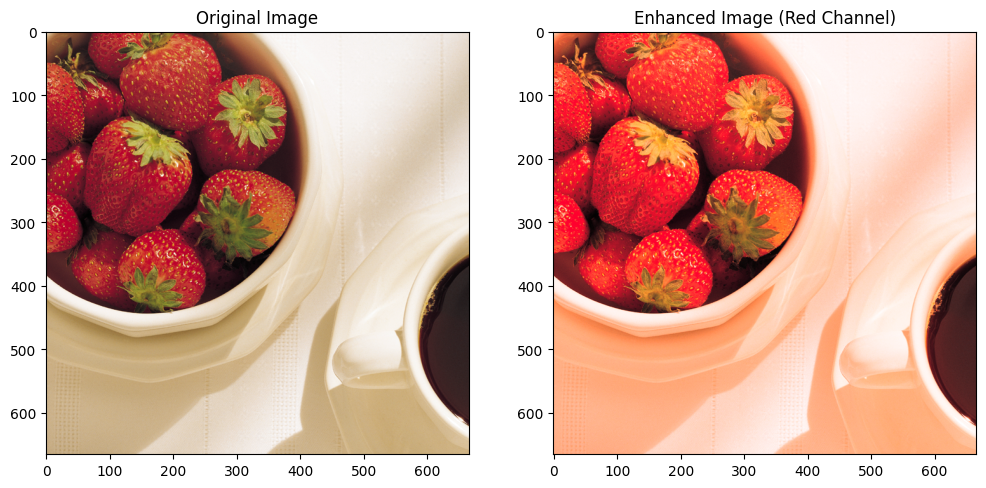

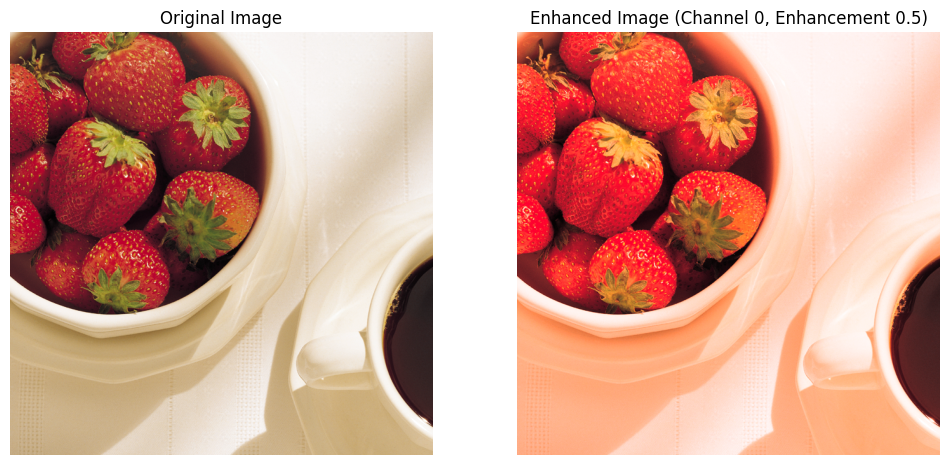

In [ ]:
def color_enhance(color_image, channel_number, enhancement_val):
  #implement this function
    image_array = np.array(color_image, dtype=np.float32)
    enhancement_val = np.clip(enhancement_val, 0, 1)
    image_array[:, :, channel_number] = np.clip(image_array[:, :, channel_number] * (1 + enhancement_val), 0, 255)
    enhanced_image = Image.fromarray(image_array.astype(np.uint8))

    return enhanced_image


channel_num= 0
enhance_val = 0.5
enhanced_image = color_enhance(img_2, channel_num, enhance_val)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original image
axes[0].imshow(img_2)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Enhanced image
axes[1].imshow(enhanced_image)
axes[1].set_title(f'Enhanced Image (Channel {channel_num}, Enhancement {enhance_val})')
axes[1].axis('off')

plt.show()

#Task 5

Write a function that takes a grayscale image as argument and returns the negative of that image. For an 8-bit image, it follows:

$$g(x,y) = L_{max} - f(x,y);$$
where $L_{max}=255$

In [ ]:
def invert_gray(gray_image):
  #implement this function
    img_array = np.array(gray_image, dtype=np.uint8)
    Lmax = 255
    negative_img_array = Lmax - img_array
    negative_image = Image.fromarray(negative_img_array)
    return negative_image


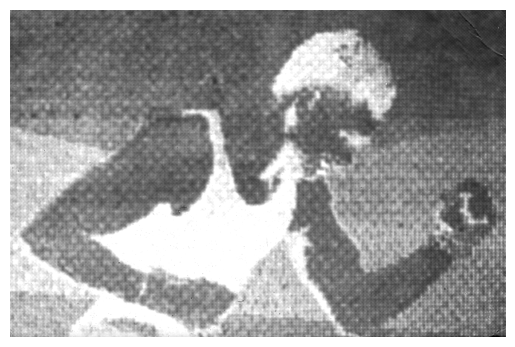

In [ ]:
neg_img=invert_gray(img)
neg_img_array = np.asarray(neg_img)
plt.imshow(neg_img_array,cmap='gray')
plt.axis('off')
plt.show()

#Task 6

Extend your function so that it works for color images too.

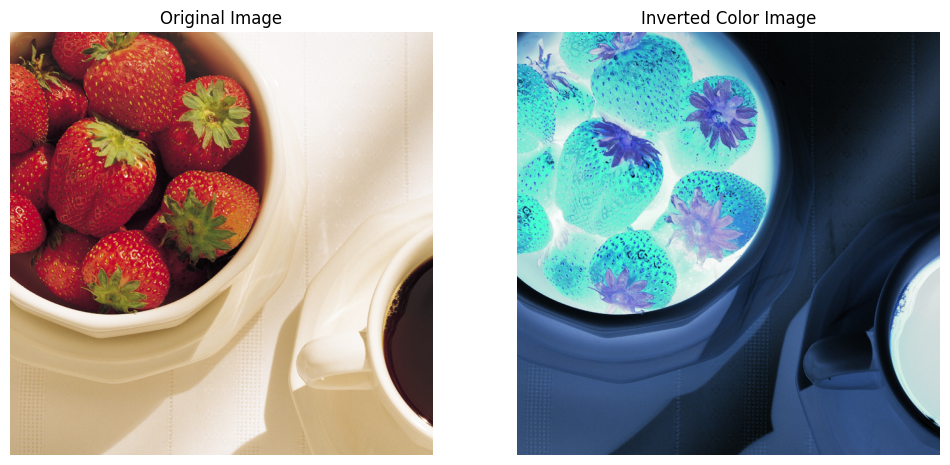

In [ ]:
def invert_color(color_image):
  #implement this function
   img_array = np.asarray(color_image, dtype=np.uint8)
   negative_image =255-img_array
   return negative_image

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original image
axes[0].imshow(img_2)
axes[0].set_title('Original Image')
axes[0].axis('off')

#Color inverted
neg_color_img=invert_color(img_2)
axes[1].imshow(neg_color_img)
axes[1].set_title("Inverted Color Image")
axes[1].axis('off')

plt.show()